In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import statsmodels.api as sm

In [5]:
import warnings

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
url='https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Employee-Attrition/data/employee-attrition.csv'

In [8]:
df = pd.read_csv(url,sep=',')
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df=df.copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
print(df.columns)
(df.shape)

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_monthly_hours', u'time_spend_company', u'work_accident',
       u'promotion_last_5years', u'department', u'salary', u'left'],
      dtype='object')


(14999, 10)

In [57]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [17]:
df.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,left
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.02,0.24
std,0.25,0.17,1.23,49.94,1.46,0.35,0.14,0.43
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [14]:
df.columns=df.columns.str.lower()

In [20]:
df.loc[df.duplicated()]
df.drop_duplicates(keep=False, inplace=True)

df.columns
df.isnull().any()


satisfaction_level       False
last_evaluation          False
number_project           False
average_monthly_hours    False
time_spend_company       False
work_accident            False
promotion_last_5years    False
department               False
salary                   False
left                     False
dtype: bool

In [45]:
df['department']=np.where(df['department']=='support','technical',df['department'])
df['department']=np.where(df['department']=='IT','technical',df['department'])
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'RandD', 'marketing'], dtype=object)

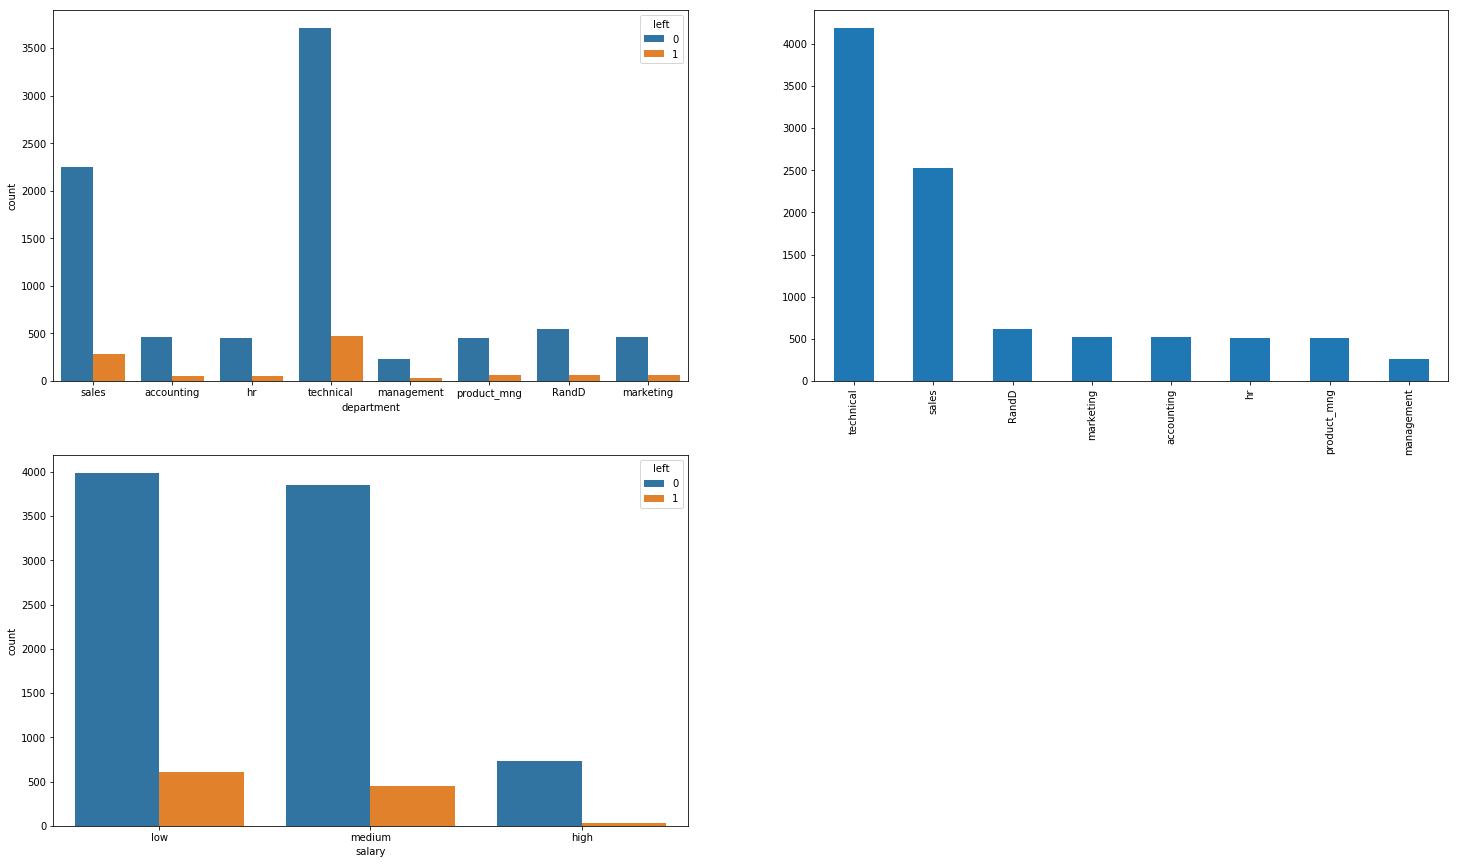

In [47]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
df.groupby(['department'])['left'].value_counts()
sns.countplot(x='department', hue='left',data=df)
plt.subplot(2,2,2)
df['department'].value_counts().plot('bar')
plt.subplot(2,2,3)
sns.countplot(x='salary', hue='left',data=df)

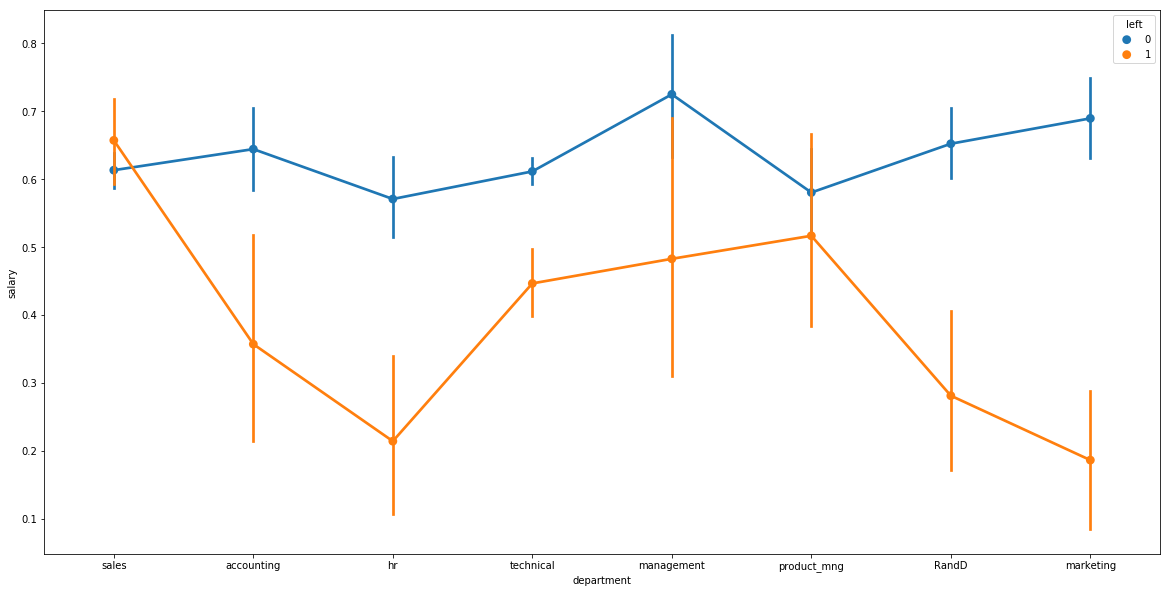

In [49]:
hr=df.copy()
hr['salary'] = hr['salary'].astype('category')
hr['salary'] = hr['salary'].cat.reorder_categories(['low','medium','high'])
hr['salary'] = hr['salary'].cat.codes

plt.figure(figsize=(20,10))
sns.pointplot(x='department',y='salary',hue='left', data=hr)

In [50]:
left_=df.groupby('left').mean()
dep_=df.groupby('department').mean()
sal_=df.groupby('salary').mean()

In [55]:
left_.round(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.67,0.72,3.79,198.79,3.10,0.17,0.01
1,0.44,0.73,3.93,209.57,3.89,0.06,0.00


In [54]:
dep_.round(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,left
department,,,,,,,,
RandD,0.63,0.72,3.85,202.09,3.27,0.17,0.02,0.10
accounting,0.63,0.72,3.84,200.55,3.25,0.15,0.01,0.11
hr,0.64,0.72,3.69,200.16,3.16,0.14,0.01,0.11
management,0.64,0.73,3.82,202.86,3.19,0.16,0.02,0.11
marketing,0.65,0.72,3.75,199.19,3.21,0.15,0.02,0.11
product_mng,0.64,0.71,3.79,198.09,3.16,0.17,0.00,0.12
sales,0.64,0.71,3.77,199.42,3.16,0.16,0.01,0.11
technical,0.64,0.72,3.83,200.10,3.20,0.16,0.01,0.11


In [56]:
sal_.round(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,left
salary,,,,,,,,
high,0.65,0.71,3.82,199.91,3.17,0.16,0.02,0.04
low,0.64,0.72,3.81,200.13,3.18,0.16,0.00,0.13
medium,0.64,0.72,3.80,199.87,3.21,0.16,0.01,0.10


In [57]:
"""
Categorical Variables

- Salary
- Department
- Number of Projects
- Left (Target Variable)
- Promotion last 5 years
- Work Accident
- Time Spent in Company

"""

'\nCategorical Variables\n\n- Salary\n- Department\n- Number of Projects\n- Left (Target Variable)\n- Promotion last 5 years\n- Work Accident\n- Time Spent in Company\n\n'

Text(0,0.5,'Frequency of turnover')

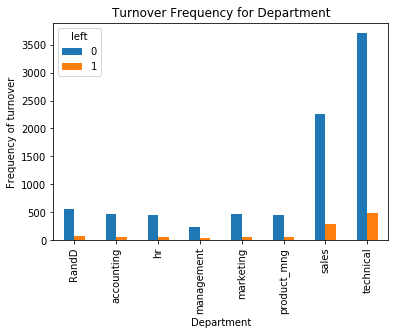

In [60]:
pd.crosstab(df['department'],df['left']).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of turnover')

Text(0,0.5,'Frequency of turnover')

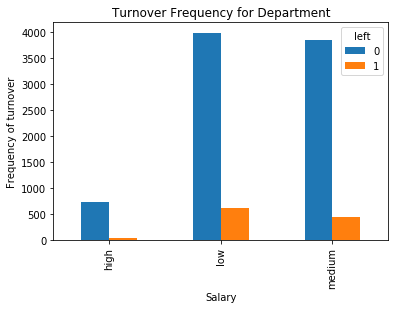

In [61]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Salary')
plt.ylabel('Frequency of turnover')

Text(0,0.5,'Frequency of Turnover')

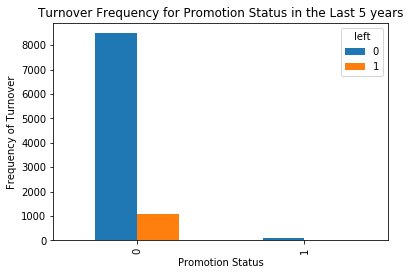

In [63]:
pd.crosstab(df['promotion_last_5years'],df['left']).plot(kind='bar')
plt.title('Turnover Frequency for Promotion Status in the Last 5 years')
plt.xlabel('Promotion Status')
plt.ylabel('Frequency of Turnover')

Text(0,0.5,'Frequency of Turnover')

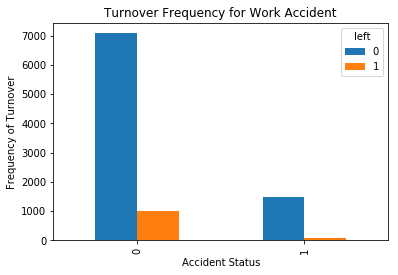

In [64]:
pd.crosstab(df['work_accident'],df['left']).plot(kind='bar')
plt.title('Turnover Frequency for Work Accident')
plt.xlabel('Accident Status')
plt.ylabel('Frequency of Turnover')

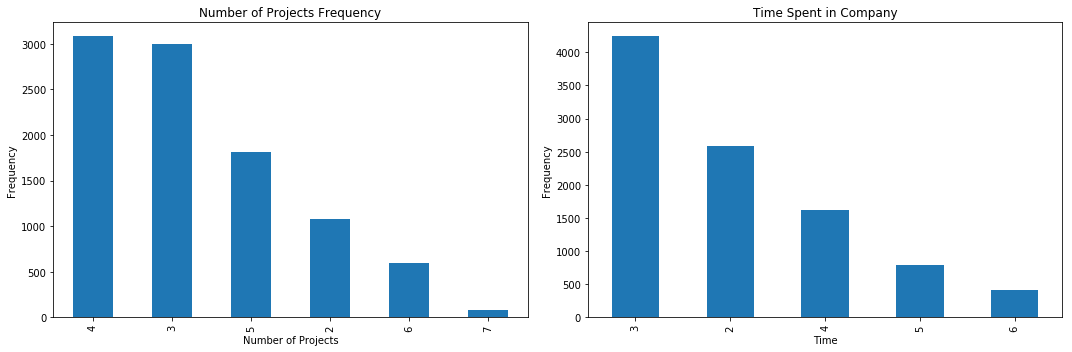

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Number of Projects Frequency')
plt.xlabel('Number of Projects')
plt.ylabel('Frequency')
hr['number_project'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.title('Time Spent in Company')
plt.xlabel('Time')
plt.ylabel('Frequency')
hr['time_spend_company'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

In [66]:
corr=df.corr().round(3).loc['left']
corr=pd.DataFrame(corr)
corr

result=[]
    
for i in corr['left']:
        if (i>-1 and i<-0.4): result.append('strong negative')
        elif (i>-0.4 and i<-0.2): result.append('moderate negative')
        elif (i>-0.2 and i<0): result.append('weak negative')
        elif(i>0 and i<0.2): result.append('weak positive')
        elif(i>0.2 and i<0.5): result.append('moderate positive')
        else : result.append('strong positive')
    
corr['correlation']=result


In [67]:
print(corr['correlation'].unique())
corr['correlation'].value_counts()

['moderate negative' 'weak positive' 'moderate positive' 'weak negative'
 'strong positive']


weak positive        3
weak negative        2
moderate negative    1
moderate positive    1
strong positive      1
Name: correlation, dtype: int64

satisfaction_level       moderate negative
last_evaluation              weak positive
number_project               weak positive
average_monthly_hours        weak positive
time_spend_company       moderate positive
work_accident                weak negative
promotion_last_5years        weak negative
left                       strong positive
Name: correlation, dtype: object

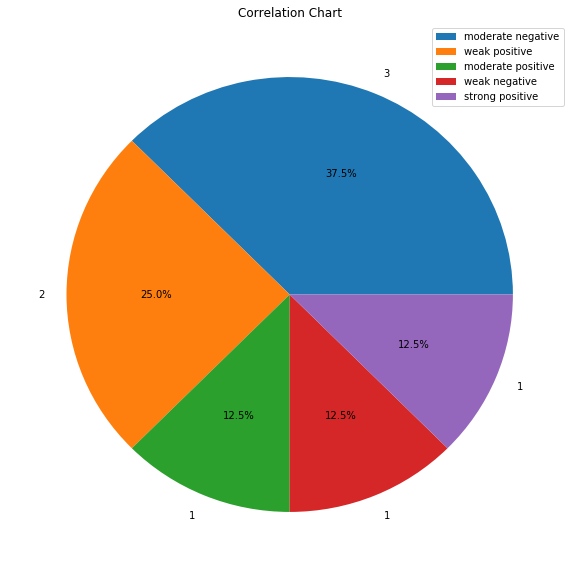

In [68]:
plt.figure(figsize=(10,10))
plt.title('Correlation Chart')
labels=corr['correlation'].unique()
plt15 = corr['correlation'].value_counts().tolist()
plt.pie(plt15, labels=plt15, autopct='%1.1f%%')
plt.legend(labels, loc=1)

corr.loc[:,'correlation']

In [69]:
"""
Variables to be taken for analysis (Based on Visualization) :
    
-Satisfaction Level
-Time Spend Company
-Last Evaluation
-Number of Projects
-Work Accident
-Promotion Last 5 years
-Salary
-Department
"""

'\nVariables to be taken for analysis (Based on Visualization) :\n    \n-Satisfaction Level\n-Time Spend Company\n-Last Evaluation\n-Number of Projects\n-Work Accident\n-Promotion Last 5 years\n-Salary\n-Department\n'

In [70]:
hr=df[['left','satisfaction_level','time_spend_company','last_evaluation','number_project','work_accident','promotion_last_5years','salary','department']]
hr=hr.reset_index(0)
hr=hr.drop(columns=['index'])
hr.head()

,left,satisfaction_level,time_spend_company,last_evaluation,number_project,work_accident,promotion_last_5years,salary,department
0,1,0.36,3,0.46,2,0,0,low,sales
1,1,0.44,3,0.57,2,0,0,low,sales
2,1,0.85,5,0.99,5,0,0,low,sales
3,1,0.78,5,0.93,5,0,0,low,sales
4,1,0.39,3,0.46,2,0,0,low,sales


In [71]:
def dummies (x,df):
    var=pd.get_dummies(df[x], drop_first=True)
    df=pd.concat([df,var],axis=1)
    df.drop([x],axis=1,inplace=True)
    return df

In [72]:
hr=dummies('department',hr)
hr=dummies('salary',hr)
hr=dummies('number_project',hr)
hr=dummies('promotion_last_5years',hr)
hr=dummies('work_accident',hr)
hr=dummies('time_spend_company',hr)

In [73]:
hr_var=hr.columns.tolist()
y=['left']
x=[var for var in hr_var if var not in y]

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
rfe=RFE(model, 10)
rfe=rfe.fit(hr[x],hr[y])
print(rfe.support_)
print(rfe.ranking_)
list(zip(hr[x].columns,rfe.support_,rfe.ranking_))
num_vars=hr[x].columns[rfe.support_]
num_vars
x=hr[num_vars]
y=hr['left']

/Users/rahulsaini/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False False False  True
 False False  True False  True False  True  True False False False False
  True  True  True False  True  True False False]
[ 2  3 23 22 18 20 17 21 19 11 12  1 10  4  1  7  1 13  1  1 16  6 14 15
  1  1  1  9  1  1  5  8]


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=LogisticRegression(random_state=0)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
model.score(x_train,y_train)

0.8721833721833722

In [81]:
model.score(x_test,y_test)

0.8860693940963231

In [ ]:
from sklearn.

In [ ]:
excel_file = 'movies.xls'
movies = pd.read_excel(excel_file)